In [1]:
import importlib
import matplotlib.pyplot as plt
import sys

sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Evolution_of_the_entropy/')
import Parallel_Run_Average_Entropy_Shared_Mem
importlib.reload(Parallel_Run_Average_Entropy_Shared_Mem)
from Parallel_Run_Average_Entropy_Shared_Mem import *


sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Analysis/')
sys.path.append('/home/hugo/PostDoc/aging_condensates/Gillespie/Analysis/')
from ToolBox import *

sys.path.append('/home/hcleroy/Extra_Module_py')
sys.path.append('/home/hugo/Extra_Module_py')
import formated_matplotlib

Ec = lambda L,N : 3/2*np.log(L/N* np.pi/3)

In [32]:
# gillespie parameter
Nlinker = 20
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = ell_tot/(V) # for 1D
Energy = -15
Nprocess = 100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
print(np.exp(Energy))
# Simulation parameters
step_tot = 2*10**6
compute_steps = 100

5.937210903914155
3.059023205018258e-07


In [3]:
for i in range(Nprocess):
    args[i][2] = kdiff
ST1 = average_simulations(args,step_tot,compute_steps)
for i in range(Nprocess):
    args[i][2] = kdiff/10
ST2 = average_simulations(args,step_tot,compute_steps)
for i in range(Nprocess):
    args[i][2] = kdiff/100
ST3 = average_simulations(args,step_tot,compute_steps)

40.198635000000024
5.573115000000001
0.6105499999999998


In [10]:
for i in range(Nprocess):
    args[i][2] = 10*kdiff
ST0 = average_simulations(args,step_tot,compute_steps)
for i in range(Nprocess):
    args[i][2] = kdiff/1000
ST4 = average_simulations(args,step_tot,compute_steps)

89.19209499999997
0.09037499999999998


In [33]:
for i in range(Nprocess):
    args[i][2] = 100*kdiff
ST_1 = average_simulations(args,step_tot,compute_steps)
for i in range(Nprocess):
    args[i][2] = 1000*kdiff
ST_2 = average_simulations(args,step_tot,compute_steps)

99.04162299999999
99.91533999999996


In [17]:
step_tot = 2*10**7
compute_steps = 500
Nprocess = 50
args = [[ell_tot,Energy,kdiff/100,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]

ST3 = average_simulations(args,step_tot,compute_steps)

0.4307296999999999


In [30]:
(kdiff/100).hex()

'0x1.210e1c99f615dp-8'

In [31]:
np.save('kdiff_'+(kdiff/100).hex()+'_ttot_2E7.npy',ST3)
np.save('kdiff_'+(kdiff*10).hex()+'_ttot_2E6.npy',ST0)

(0.1, 1000000)

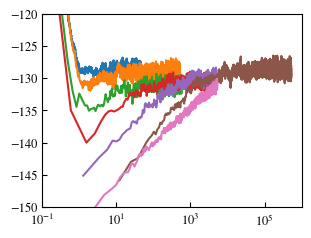

In [39]:
plt.plot(ST_2[:,0],ST_2[:,1])
plt.plot(ST_1[:,0],ST_1[:,1])
plt.plot(ST0[:,0],ST0[:,1])#/abs(min(ST1[:,1])))
plt.plot(ST1[:,0],ST1[:,1])#/abs(min(ST1[:,1])))
plt.plot(ST2[:,0],ST2[:,1])#/abs(min(ST2[:,1])))
plt.plot(ST3[:,0],ST3[:,1])#/abs(min(ST3[:,1])))
plt.plot(ST4[:,0],ST4[:,1])#/abs(min(ST1[:,1])))
plt.ylim(-150,-120)
plt.xscale('log')
plt.xlim(0.1,10**6)